## Obtaining the Dataset

In [ ]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Setting the angle of rotation
angle = 180

# Setting the seed
torch.manual_seed(83)

train = torchvision.datasets.MNIST('', train=True, download=True,transform=transforms.Compose([transforms.ToTensor(),transforms.RandomRotation(angle)]))
test = torchvision.datasets.MNIST('', train=False, download=True,transform=transforms.Compose([transforms.ToTensor(),transforms.RandomRotation(angle)]))
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)


100%|██████████| 9912422/9912422 [00:00<00:00, 84154374.32it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 34335514.12it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21090307.32it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 15576883.70it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



Visuializing the dataset

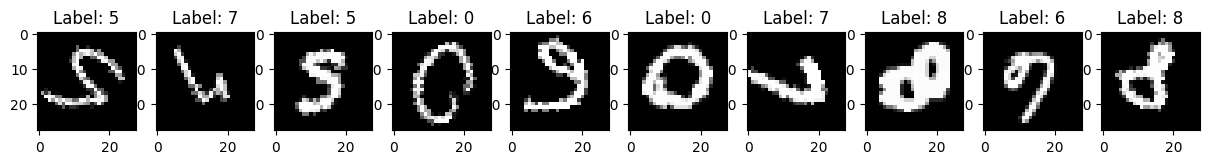

In [ ]:
import matplotlib.pyplot as plt

# Get a batch of images from the training set
images, labels = next(iter(trainset))

# Plot the images
fig, axs = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    axs[i].imshow(images[i].squeeze(), cmap='gray')
    axs[i].set_title(f'Label: {labels[i]}')
plt.show()

Here we can see that the images are rotated randomly from -180 to 180 degrees

## Building the Network

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__() 
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.pool  = nn.AvgPool2d(kernel_size=2)
        self.fc1 = nn.Linear(256, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        y = self.conv1(x)
        y = F.relu(y)
        y = self.pool(y)
        y = self.conv2(y)
        y = F.relu(y)
        y = self.pool(y)
        y = y.view(y.shape[0], -1)
        y = self.fc1(y)
        y = F.relu(y)
        y = self.fc2(y)
        y = F.relu(y)
        y = self.fc3(y)

        return y

            

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net().to(device)
print(net)
loss_criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=256, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)


Used the SGD optimizer

In [ ]:
yloss = []
maxEpochs = 20

for epoch in range(maxEpochs): 
    for data in trainset:  
        X, y = data
        X = X.to(device)
        y = y.to(device) 
        net.zero_grad()  
        output = net(X)  
        loss = loss_criterion(output, y)

        # Backpropergation 
        loss.backward()  
        optimizer.step()  
    yloss.append(loss.detach().numpy())
    print("Epoch ", epoch+1,": ",loss.detach().numpy()) 

Epoch  0 :  0.18656227
Epoch  1 :  0.037444416
Epoch  2 :  0.043334723
Epoch  3 :  0.01564204
Epoch  4 :  0.97160566
Epoch  5 :  0.07589187
Epoch  6 :  0.12973654
Epoch  7 :  0.011009684
Epoch  8 :  0.62953913
Epoch  9 :  0.2668561
Epoch  10 :  0.08095348
Epoch  11 :  0.19696659
Epoch  12 :  0.09172824
Epoch  13 :  0.0031413292
Epoch  14 :  0.012876135
Epoch  15 :  0.031661484
Epoch  16 :  0.060831696
Epoch  17 :  0.18009801
Epoch  18 :  0.009076366
Epoch  19 :  0.0745377


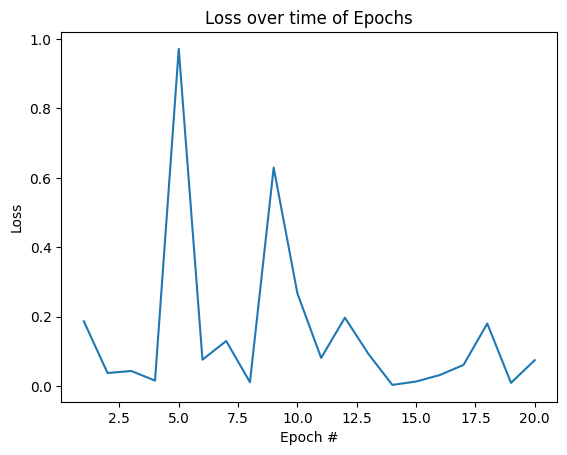

In [ ]:
xAxis = list(range(1,maxEpochs+1))
fig, ax = plt.subplots()
ax.plot(xAxis,yloss)
ax.set(xlabel = "Epoch #", ylabel = "Loss", title = "Loss over time of Epochs")
plt.show()

## Testing the accuracy of the model

In [ ]:
correct = 0
total = 0

with torch.no_grad():
    for data in testset:
        X, y = data
        X = X.to(device)
        y = y.to(device)
        output = net(X)
        
        for idx, i in enumerate(output):
          if torch.argmax(i) == y[idx]:
            correct += 1
          total += 1

print("Accuracy: ", round(correct/total, 4))

Accuracy:  0.9603
